In [1]:
# Question1

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.datasets import fashion_mnist
import math
import numpy as np

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

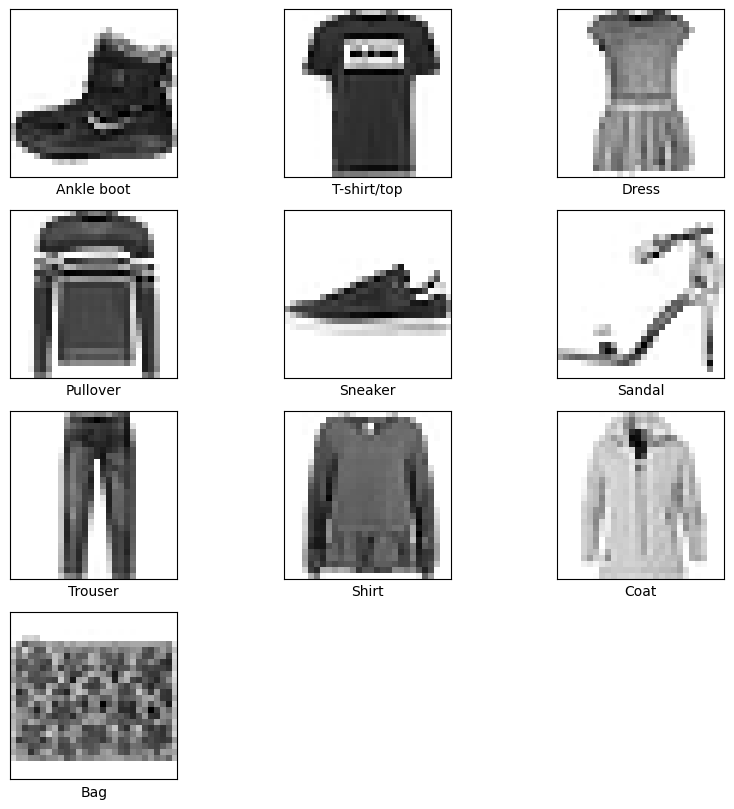

In [4]:
def plot_MNist(train_images,train_labels):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    class_set = set(class_names)
    plt.figure(figsize=(10, 10))
    cnt=1
    for i in range(len(train_images)):
        if(len(class_set)==0):
            break
        if(class_names[train_labels[i]] in class_set):
            plt.subplot(4,3,cnt)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(train_images[i],cmap=plt.cm.binary)
            plt.xlabel(class_names[train_labels[i]])
            class_set.remove(class_names[train_labels[i]])
            cnt+=1
    plt.show()

plot_MNist(train_images,train_labels)
# plot_MNist(test_images,test_labels)

In [5]:
# Question 2

In [35]:
class FeedForwardNeuralNetwork:
    def __init__(self, hiddenLayers, neuronPerHiddenLayer, neuronOutputLayer, neuronsInputLayer):
        self.hiddenLayers = hiddenLayers # 2
        #[inputNeurons, 10,12, outputNeurons](list[i] - no. of neurons in ith hidden layer, 0-indexing)
        self.neuronPerHiddenLayer = [neuronsInputLayer] + neuronPerHiddenLayer + [neuronOutputLayer]
        # print(len(self.neuronPerHiddenLayer))
        self.neuronOutputLayer = neuronOutputLayer # 10(int)
        self.neuronsInputLayer = neuronsInputLayer
        self.weightMatrix = [0]
        self.bias = [0]
        np.random.seed(55)
        np.random.RandomState(55)
        for j in range(1,len(self.neuronPerHiddenLayer)):
            # print("j = ",j, "neuronPerHiddenLayer[{}] = {}".format(j,self.neuronPerHiddenLayer[j]))
            self.weightMatrix.append(np.random.randn(self.neuronPerHiddenLayer[j],self.neuronPerHiddenLayer[j-1]))
            # use bias Transpose for vector addition
            self.bias.append(np.zeros((1,self.neuronPerHiddenLayer[j])))
            # weightMatrix_1.append([[ for i in range(neuronPerHiddenLayer[j-1])] for k in range(neuronPerHiddenLayer[j])])
        # self.weightMatrix =  np.array(weightMatrix)
        
        
    def softMax(self,aL):
        den=0
        # print(aL.shape)
        # print(aL)
        for i in range(self.neuronOutputLayer):
            den+=np.exp(aL[0][i])
        y = [0 for i in range(self.neuronOutputLayer)]
        for i in range(self.neuronOutputLayer):
            y[i] = np.exp(aL[0][i])/den
        return y

    def LossFunction(self,outputArray,trueClass):
        # trueClass is number from 0 to 9 inclusive for the assignment
        loss = -math.log2(outputArray[trueClass])
        return loss

    def activation(self,a_i):
        return a_i * (a_i > 0)
        
    def forward_pass(self,X,Y):
        probability=[]
        for x,y in zip(X,Y):
            input = x.reshape(1,-1).T
            for i in range(1,self.hiddenLayers+1):
                print("i = ",i)
                print(self.weightMatrix[i].shape)
                print(input.shape)
                a_i = self.bias[i].T + self.weightMatrix[i]@input
                h_i = self.activation(a_i)
                input=h_i
            a_l = self.bias[self.hiddenLayers+1].T+self.weightMatrix[self.hiddenLayers+1]@h_i
            out = self.softMax(a_l.T)
            probability.append(out)
        return probability
            
            

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images/255.0
test_images = test_images/255.0

train_images, validation_images, train_labels, validation_labels = train_test_split(train_images,train_labels, test_size=0.1,random_state=55)
encoder = OneHotEncoder()
train_labels = encoder.fit_transform(np.expand_dims(train_labels,1)).toarray()
validation_labels = encoder.fit_transform(np.expand_dims(validation_labels,1)).toarray()
test_labels = encoder.fit_transform(np.expand_dims(test_labels,1)).toarray()


In [ ]:
neuronPerHiddenLayer = [100,110,120]
hiddenLayers = len(neuronPerHiddenLayer)
neuronOutputLayer = train_labels.shape[1]
neuronsInputLayer = train_images.shape[1]**2
feedForward = FeedForwardNeuralNetwork(hiddenLayers, neuronPerHiddenLayer, neuronOutputLayer, neuronsInputLayer)
answers = feedForward.forward_pass(train_images,train_labels)
print(answers[0])

i =  1
(100, 784)
(784, 1)
i =  2
(110, 100)
(100, 1)
i =  3
(120, 110)
(110, 1)
(1, 10)
[[-2391.30902137 -4338.78917248 -4470.1880505    282.89173422
   1486.89780855 -5749.43014556 -3402.36827887  1360.95582533
  -4629.45159494 -4997.85875501]]
i =  1
(100, 784)
(784, 1)
i =  2
(110, 100)
(100, 1)
i =  3
(120, 110)
(110, 1)
(1, 10)
[[   954.03200243 -10089.61631624   -646.21038563  -7089.79450158
    1424.1079242  -12857.43699107  -1152.46009592   2528.25734865
   -5336.36537657  -2641.13408793]]
i =  1
(100, 784)
(784, 1)
i =  2
(110, 100)
(100, 1)
i =  3
(120, 110)
(110, 1)
(1, 10)
[[ -846.61753836 -3962.35032389   -83.78059426   404.69566177
  -1234.76990773 -2483.93973965   348.68480813   386.47681569
   1215.38209049   475.1186793 ]]
i =  1
(100, 784)
(784, 1)
i =  2
(110, 100)
(100, 1)
i =  3
(120, 110)
(110, 1)
(1, 10)
[[ 2301.68660106 -8363.0623596  -2806.41384336 -4369.50015258
    998.76639165 -5547.03738413 -2753.64898242  2424.63870743
  -3200.37806538 -1506.28435477]]
i 

C:\Users\ravis\AppData\Local\Temp\ipykernel_66324\861000975.py:27: RuntimeWarning: overflow encountered in exp
  den+=np.exp(aL[0][i])
C:\Users\ravis\AppData\Local\Temp\ipykernel_66324\861000975.py:30: RuntimeWarning: overflow encountered in exp
  y[i] = np.exp(aL[0][i])/den
C:\Users\ravis\AppData\Local\Temp\ipykernel_66324\861000975.py:30: RuntimeWarning: invalid value encountered in scalar divide
  y[i] = np.exp(aL[0][i])/den


i =  3
(120, 110)
(110, 1)
(1, 10)
[[  223.31708681 -4985.52541671  -316.07602742 -3542.31469266
  -1315.20471761 -4718.99460722 -2749.38585164  1363.18427408
   -651.67458153  1882.77170032]]
i =  1
(100, 784)
(784, 1)
i =  2
(110, 100)
(100, 1)
i =  3
(120, 110)
(110, 1)
(1, 10)
[[   17.68585448 -6146.29616986 -3591.51150405 -1622.10575429
   4519.96038447 -7391.84342511 -7084.97012872  4578.07371637
  -1197.34937869 -2091.30100835]]
i =  1
(100, 784)
(784, 1)
i =  2
(110, 100)
(100, 1)
i =  3
(120, 110)
(110, 1)
(1, 10)
[[ -686.53861495 -5056.03142303   159.48544887  -819.46210006
  -1852.16280821 -2835.06061785 -1744.53731334  2825.96807367
   1885.49912149  3675.54507091]]
i =  1
(100, 784)
(784, 1)
i =  2
(110, 100)
(100, 1)
i =  3
(120, 110)
(110, 1)
(1, 10)
[[  3927.83674117  -8771.39278755  -1677.23574844  -6037.34831222
    2131.91847584 -10017.17579332  -4856.01058767   3504.85374345
   -5792.8993424   -1487.55749308]]
i =  1
(100, 784)
(784, 1)
i =  2
(110, 100)
(100, 1)
i 

In [11]:
print(train_labels.shape)
print(train_images.size)
print(train_images.shape)
print(type(train_images))

(54000, 10)
42336000
(54000, 28, 28)
<class 'numpy.ndarray'>


In [30]:
print(train_images[0].shape)

(28, 28)


In [31]:
print(len(train_labels))

54000


In [32]:
print(train_labels.shape)

(54000,)


In [33]:
print(test_images.shape)

(10000, 28, 28)


In [34]:
print(test_labels.shape)

(10000,)


In [9]:
np.zeros((1,4))

array([[0., 0., 0., 0.]])